In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
# importing csv file
df = pd.read_csv('nba_2017_nba_players_with_salary.csv')
df.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 39 columns):
Unnamed: 0         342 non-null int64
Rk                 342 non-null int64
PLAYER             342 non-null object
POSITION           342 non-null object
AGE                342 non-null int64
MP                 342 non-null float64
FG                 342 non-null float64
FGA                342 non-null float64
FG%                342 non-null float64
3P                 342 non-null float64
3PA                342 non-null float64
3P%                320 non-null float64
2P                 342 non-null float64
2PA                342 non-null float64
2P%                342 non-null float64
eFG%               342 non-null float64
FT                 342 non-null float64
FTA                342 non-null float64
FT%                337 non-null float64
ORB                342 non-null float64
DRB                342 non-null float64
TRB                342 non-null float64
AST                342 

In [9]:
df['3p%'] = df['3P'] / df['3PA']

In [95]:
# creating a new data frame with the columns I am interested working with
nba = df[['PLAYER', 'POSITION','TEAM','SALARY_MILLIONS','FG%','3p%','eFG%','POINTS','AST','STL','TRB','AGE','TOV']]

In [39]:
nba.head()

,PLAYER,POSITION,TEAM,SALARY_MILLIONS,FG%,3p%,eFG%,POINTS,AST,STL,TRB,AGE
0,Russell Westbrook,PG,OKC,26.50,0.425,0.347222,0.476,31.6,10.4,1.6,10.7,28
1,James Harden,PG,HOU,26.50,0.440,0.344086,0.525,29.1,11.2,1.5,8.1,27
2,Isaiah Thomas,PG,BOS,6.59,0.463,0.376471,0.546,28.9,5.9,0.9,2.7,27
3,Anthony Davis,C,NO,22.12,0.505,0.277778,0.518,28.0,2.1,1.3,11.8,23
4,DeMarcus Cousins,C,NO/SAC,16.96,0.452,0.360000,0.498,27.0,4.6,1.4,11.0,26


In [6]:
sns.set_style('whitegrid')

In [21]:
features = pd.get_dummies(nba['POSITION'])

In [22]:
features['guard'] = np.where((nba['POSITION'].isin(['PG','SG'])), 1, 0)

In [24]:
print(pd.crosstab(features['guard'], nba['POSITION']))

POSITION   C  PF  PF-C  PG  SF  SG
guard                             
0         67  70     2   0  65   0
1          0   0     0  70   0  68


In [25]:
features['forward'] = np.where((nba['POSITION'].isin(['PF','SF'])), 1, 0)

In [109]:
features['bigman'] = np.where((nba['POSITION'].isin(['C','PF-C'])), 1, 0)

In [40]:
features['old'] = np.where(nba['AGE']>=28, 1, 0)
print(nba['AGE'].groupby(features['old']).describe())

     count       mean       std   min   25%   50%    75%   max
old                                                           
0    206.0  23.597087  2.309639  19.0  22.0  24.0  25.75  27.0
1    136.0  30.757353  2.720284  28.0  29.0  30.0  32.00  40.0


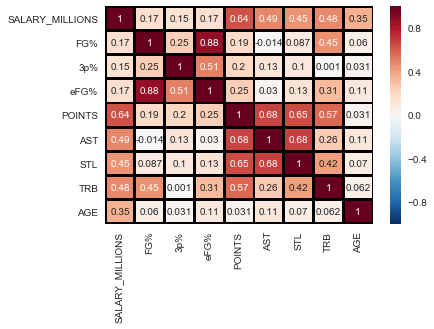

In [62]:
sns.heatmap(nba.corr(), linecolor='black', linewidths=2, annot=True)

In [54]:
means = nba[['POINTS','STL','AST','TRB','SALARY_MILLIONS']].mean(axis=0)
stds = nba[['POINTS','STL','AST','TRB','SALARY_MILLIONS']].std(axis=0)
features['statmoney'] = ((nba[['POINTS','STL','AST','TRB','SALARY_MILLIONS']] - means) / stds).mean(axis=1)

In [55]:
nbadf = nba.loc[:,['POINTS','STL','AST','TRB','SALARY_MILLIONS']]
nbadf['statmoney'] = features['statmoney']

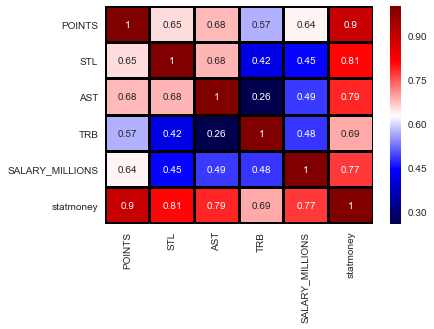

In [60]:
sns.heatmap(nbadf.corr(), cmap='seismic', linecolor='black', linewidths=2, annot=True)

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


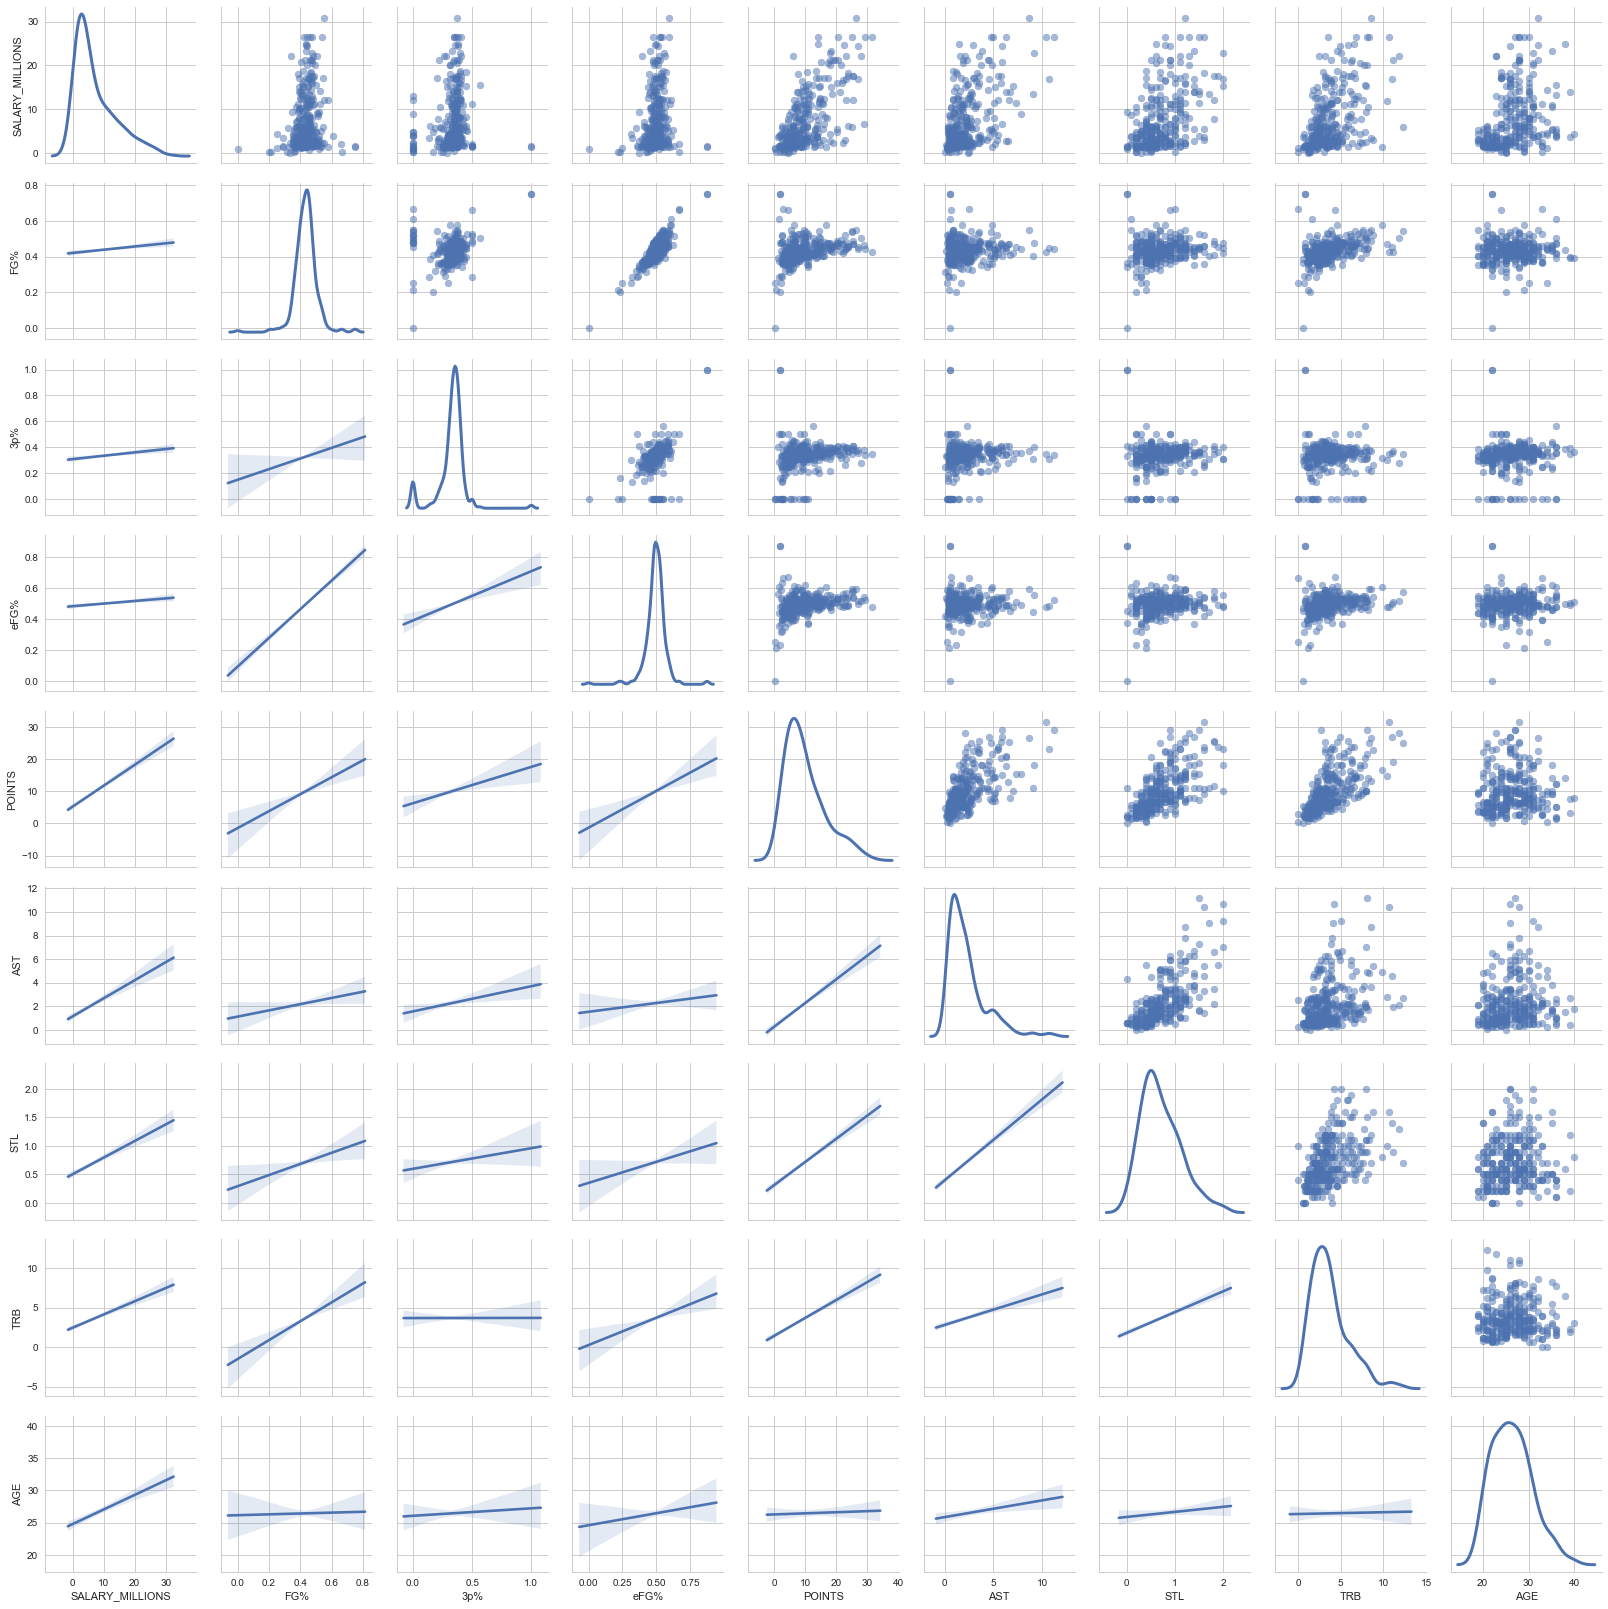

In [76]:
gd = sns.PairGrid(nba.dropna(), diag_sharey=False)
gd.map_upper(plt.scatter, alpha=.5)
gd.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
gd.map_diag(sns.kdeplot, lw=3)

In [93]:
'''fig = plt.figure()

fig.add_subplot(221)
plt.hist(nba['AST'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(nba['AST'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(nba['AST'].dropna()))
plt.title('Square Root')

fig.add_subplot(224)
plt.hist(1 / nba['AST'].dropna())
plt.title('Inverse') '''

"fig = plt.figure()\n\nfig.add_subplot(221)\nplt.hist(nba['AST'].dropna())\nplt.title('Raw')\n\nfig.add_subplot(222)\nplt.hist(np.log(nba['AST'].dropna()))\nplt.title('Log')\n\nfig.add_subplot(223)\nplt.hist(np.sqrt(nba['AST'].dropna()))\nplt.title('Square Root')\n\nfig.add_subplot(224)\nplt.hist(1 / nba['AST'].dropna())\nplt.title('Inverse') "

<function matplotlib.pyplot.tight_layout>

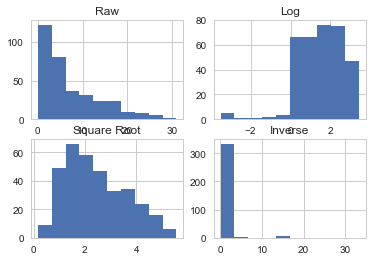

In [88]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(nba['SALARY_MILLIONS'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(nba['SALARY_MILLIONS'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(nba['SALARY_MILLIONS'].dropna()))
plt.title('Square Root')

fig.add_subplot(224)
plt.hist(1 / nba['SALARY_MILLIONS'].dropna())
plt.title('Inverse')
plt.tight_layout

In [90]:
features['sal_sqrt'] = (np.sqrt(nba['SALARY_MILLIONS']))

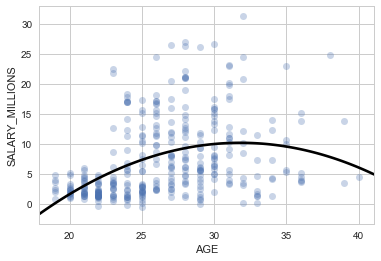

In [91]:
sns.regplot(
    x=nba['AGE'],
    y=nba['SALARY_MILLIONS'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)

In [92]:
features['age_squared'] = nba['AGE'] ** 2

In [94]:
features.head()

,C,PF,PF-C,PG,SF,SG,guard,forward,old,statmoney,sal_sqrt,age_squared
0,0,0,0,1,0,0,1,0,1,3.193192,5.147815,784
1,0,0,0,1,0,0,1,0,0,2.933217,5.147815,729
2,0,0,0,1,0,0,1,0,0,1.014492,2.567100,729
3,1,0,0,0,0,0,0,0,0,2.011526,4.703190,529
4,1,0,0,0,0,0,0,0,0,2.067791,4.118252,676


In [96]:
# add turn overs to nba df for a neg example

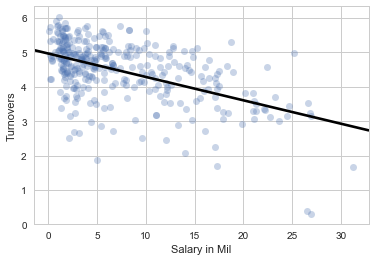

In [102]:
features['turnovers'] = max(nba['TOV']) - nba['TOV']

sns.regplot(
    nba['SALARY_MILLIONS'],
    features['turnovers'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Salary in Mil')
plt.ylabel('Turnovers')

In [103]:
# alright, didn't expect that

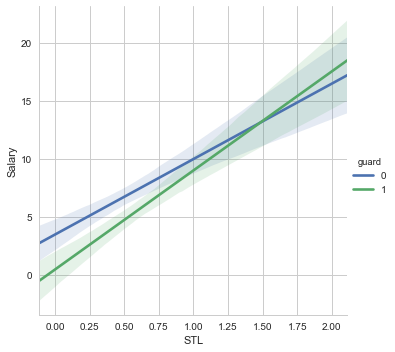

In [105]:
features['Salary'] = nba['SALARY_MILLIONS']
features['STL'] = nba['STL']

sns.lmplot(
    x='STL',
    y='Salary',
    hue='guard',
    data=features,
    scatter=False
)

In [106]:
features['guardstl'] = features['STL'] * features['Salary']

In [110]:
features.head()

,C,PF,PF-C,PG,SF,SG,guard,forward,old,statmoney,sal_sqrt,age_squared,turnovers,Salary,STL,guardstl,bigman
0,0,0,0,1,0,0,1,0,1,3.193192,5.147815,784,0.3,26.50,1.6,42.400,0
1,0,0,0,1,0,0,1,0,0,2.933217,5.147815,729,0.0,26.50,1.5,39.750,0
2,0,0,0,1,0,0,1,0,0,1.014492,2.567100,729,2.9,6.59,0.9,5.931,0
3,1,0,0,0,0,0,0,0,0,2.011526,4.703190,529,3.3,22.12,1.3,28.756,1
4,1,0,0,0,0,0,0,0,0,2.067791,4.118252,676,2.0,16.96,1.4,23.744,1


## 


1)
2)
3)
4)
5)

In [120]:
nba_pca = nba[['SALARY_MILLIONS', 'FG%', '3p%', 'eFG%',
       'POINTS', 'AST', 'STL', 'TRB', 'AGE', 'TOV']].dropna()

X = StandardScaler().fit_transform(nba_pca)

sklearn_pca = PCA(n_components=10)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.43064302  0.19615193  0.11290726  0.09293626  0.05981445  0.04177511
  0.03317161  0.01886083  0.00806238  0.00567715]


In [122]:
features_pca = features.dropna()

X = StandardScaler().fit_transform(features_pca)

sklearn_pca = PCA(n_components=10)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.28174394  0.17433798  0.154247    0.10910627  0.07535068  0.07287292
  0.05914324  0.0356336   0.01744746  0.01101573]


In [116]:
nba.columns

Index(['PLAYER', 'POSITION', 'TEAM', 'SALARY_MILLIONS', 'FG%', '3p%', 'eFG%',
       'POINTS', 'AST', 'STL', 'TRB', 'AGE', 'TOV'],
      dtype='object')

In [119]:
sal_pca = nba[['SALARY_MILLIONS','eFG%',
       'POINTS']].dropna()

X = StandardScaler().fit_transform(sal_pca)

sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.58386259  0.29654542  0.11959199]


In [128]:
guard_pca = features[['guard','guardstl']].dropna()

X = StandardScaler().fit_transform(guard_pca)

sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.52869942  0.47130058]


In [126]:
features.columns

Index(['C', 'PF', 'PF-C', 'PG', 'SF', 'SG', 'guard', 'forward', 'old',
       'statmoney', 'sal_sqrt', 'age_squared', 'turnovers', 'Salary', 'STL',
       'guardstl', 'bigman'],
      dtype='object')